# Lead Score - Case Study

## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [2]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 1: Importing and read the Dataset

In [3]:
Leads= pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe(number of rows * number of columns)
Leads.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# check the type of each column
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 2: Data Cleaning

In [7]:
#checking duplicates
sum(Leads.duplicated(subset = 'Prospect ID')) == 0

True

No duplicate values

In [8]:
# As we can observe in our Problem statement as well as in our data there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.So we are replacing them with Null values.

# Converting 'Select' values to NaN.
Leads = Leads.replace('Select', np.nan)

In [9]:
# Check the Percentage of null values
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# we will drop the columns having more than 70% NA values.
Leads= Leads.drop(Leads.loc[:,list(round(100*(Leads.isnull().sum()/len(Leads.index)), 2)>70)].columns, 1)

In [11]:
# Check the Percentage of null values
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

## Now we will take care of null values in each column one by one.

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

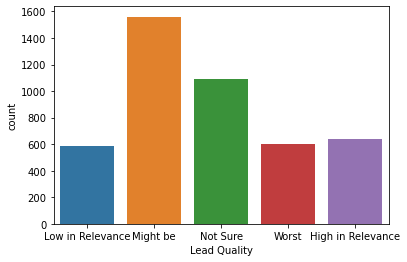

In [12]:
# Lead Quality:Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
sns.countplot(Leads['Lead Quality'])

In [13]:
# As Lead quality is based on the intution of employee, 'MIght be' and 'Not sure' are high values if we impute the 'Might be' values it will lead to false insight so we will impute 'Not Sure' in NaN safely.

Leads['Lead Quality'] = Leads['Lead Quality'].replace(np.nan, 'Not Sure')

In [14]:
# Asymmetrique Activity Index
# Asymmetrique Profile Index --  
# Asymmetrique Activity Score --  
# Asymmetrique Profile Score 
#An index and score assigned to each customer based on their activity and their profile. we can drop these columns.

Leads = Leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [15]:
# City

Leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

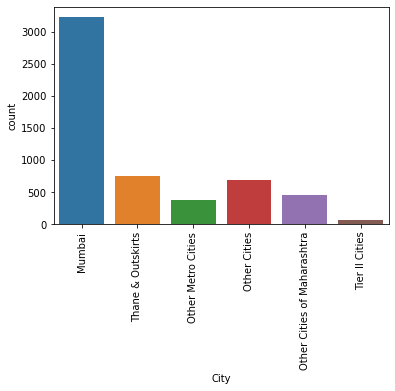

In [16]:
sns.countplot(Leads.City)
plt.xticks(rotation = 90) 

We can impute the missing values with Mode value here Mumbai has the highest number among the cities so we can impute Mumbai in the missing values.

In [17]:
Leads['City'] = Leads['City'].replace(np.nan, 'Mumbai')

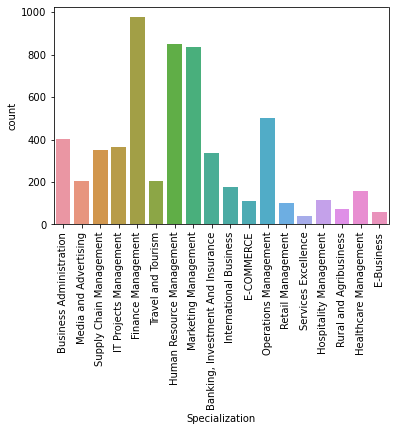

In [18]:
# Specailization
sns.countplot(Leads.Specialization)
plt.xticks(rotation = 90)
plt.show()

Here We have different types of specializations may be we can impute NAN-values with 'Others'.

In [20]:
Leads['Specialization'] = Leads['Specialization'].replace(np.nan, 'Other Specialization')

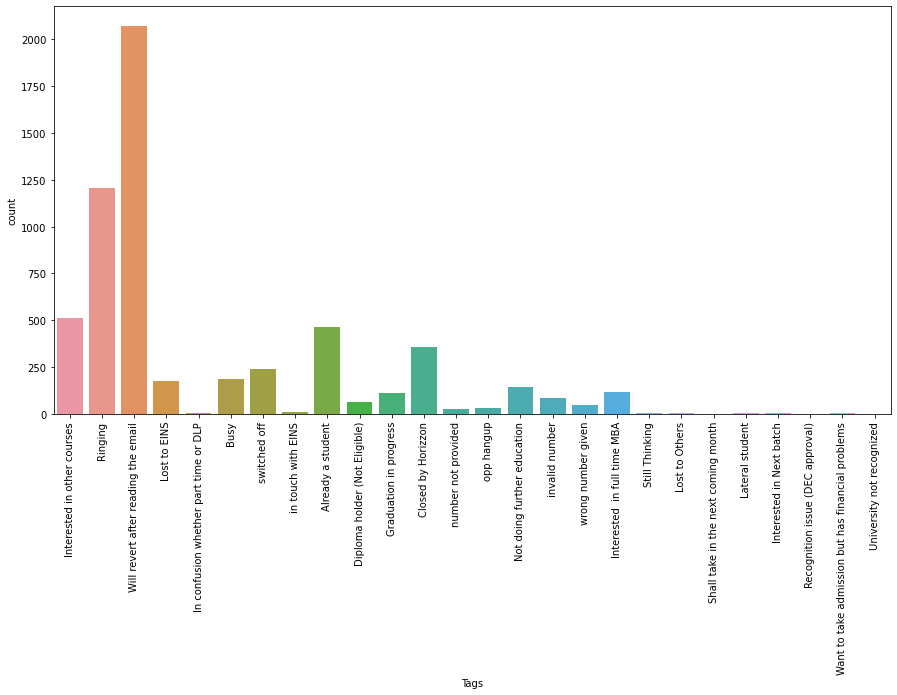

In [21]:
# Tags 
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(Leads.Tags)
plt.xticks(rotation = 90)
plt.show()

By using missing values treatment 'MODE', we can replace missing values with 'Will revert after reading the email'.

In [22]:
Leads['Tags'] = Leads['Tags'].replace(np.nan, 'Will revert after reading the email')

In [23]:
# What matters most to you in choosing a course
Leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

### Impute null values with 'Better Career Prospects'

In [24]:
Leads['What matters most to you in choosing a course'] = Leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


In [25]:
# Occupation
Leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

More than 80% entries are of Unemployed so we can impute "Unemployed" in it.

In [26]:
Leads['What is your current occupation'] = Leads['What is your current occupation'].replace(np.nan, 'Unemployed')


In [27]:
# Country
Leads['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

We can impute missing values with 'India' as most entries are from india.

In [28]:
# Country is India for most values so let's impute it in missing values.
Leads['Country'] = Leads['Country'].replace(np.nan, 'India')

In [29]:
# Check the Percentage of null values
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [30]:
# We can drop Lead number column also
Leads.drop(['Lead Number'],axis=1,inplace=True)

In [31]:
# Rest missing values are under 2% so we can drop these rows.
Leads.dropna(inplace = True)

In [32]:
round(100*(Leads.isnull().sum()/len(Leads.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

Now Data is clean and we can start with the analysis part.

## Step 2: Exploratory Data Analytics

### Univariate Analysis

### Lead Origin

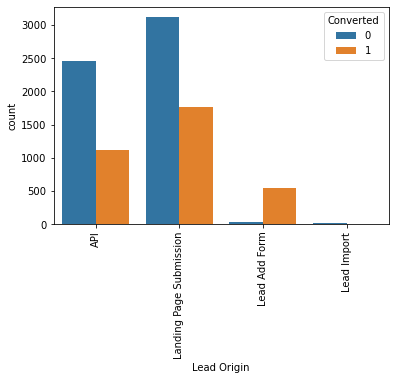

In [33]:
# 'Converted' is the target variable, It Indicates whether a lead has been successfully converted (1) or not (0).
ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show()

Inference:

1.API and Landing Page Submission have more conversion rate among the Lead origins.

2.Lead Add Form has more than 90% conversion rate but count of lead are not very high.

3.Lead Import are very less in count.

To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin.

### Lead Source



<function matplotlib.pyplot.show(close=None, block=None)>

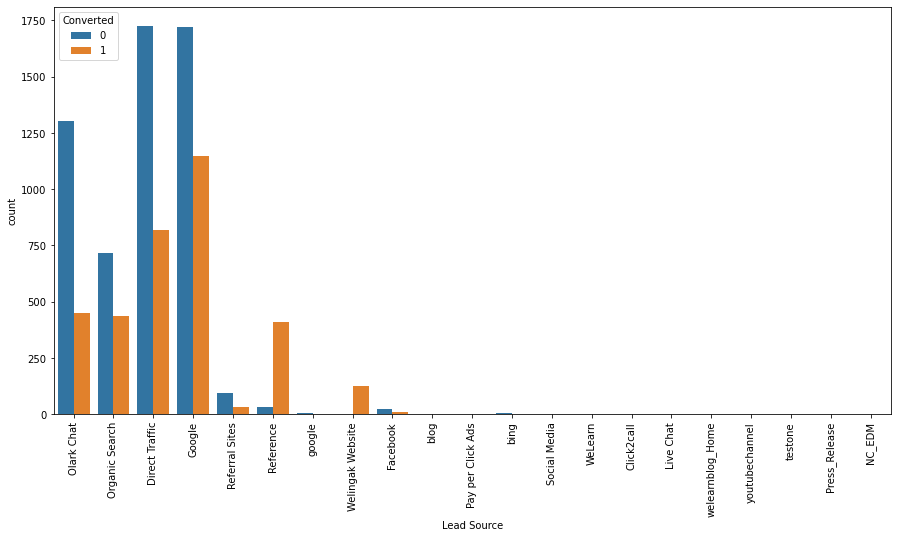

In [34]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show

Inference:

1.We are getting maximum number of leads from Google and Direct traffic generates

2.Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic, and google leads at the same time focus on generate more leads from reference and welingak website.

### Total Visits

In [36]:
Leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

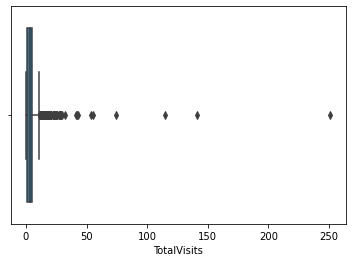

In [37]:
sns.boxplot(Leads['TotalVisits'])

In [38]:
# As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.
percentiles = Leads['TotalVisits'].quantile([0.05,0.95]).values
Leads['TotalVisits'][Leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
Leads['TotalVisits'][Leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

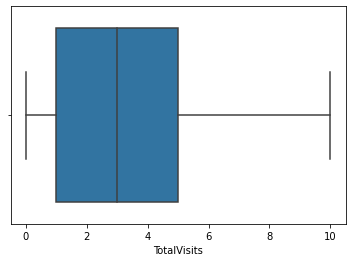

In [39]:
sns.boxplot(Leads['TotalVisits'])

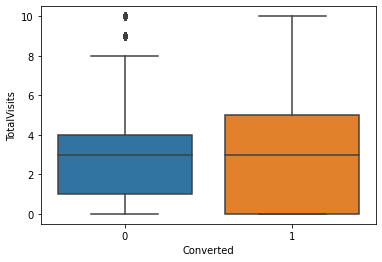

In [40]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data =Leads)
plt.show()

### Total Time Spent on Website

<AxesSubplot:xlabel='Total Time Spent on Website'>

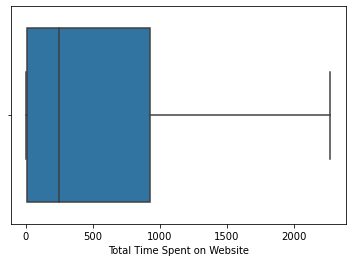

In [41]:
sns.boxplot(Leads['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

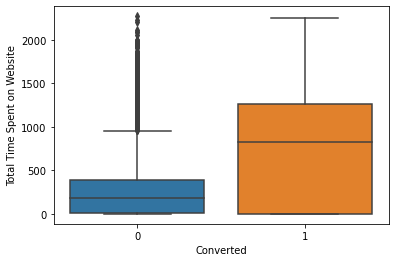

In [42]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads)

Inference:

Leads spending more time on the weblise are more likely to be converted so we need to focus on engaging more in website.

### Last Activity

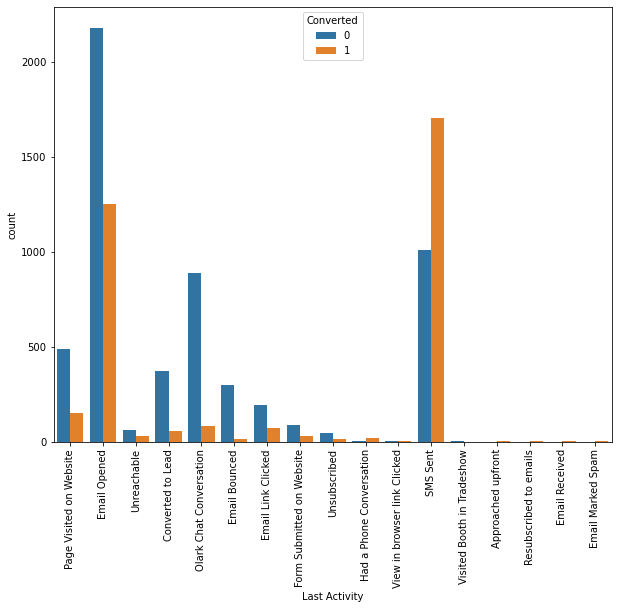

In [43]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "Last Activity", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show()

In [44]:
# Let's club all east considerable ones to "Other_Activity" other than considerable ones.
Leads['Last Activity'] = Leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity') 

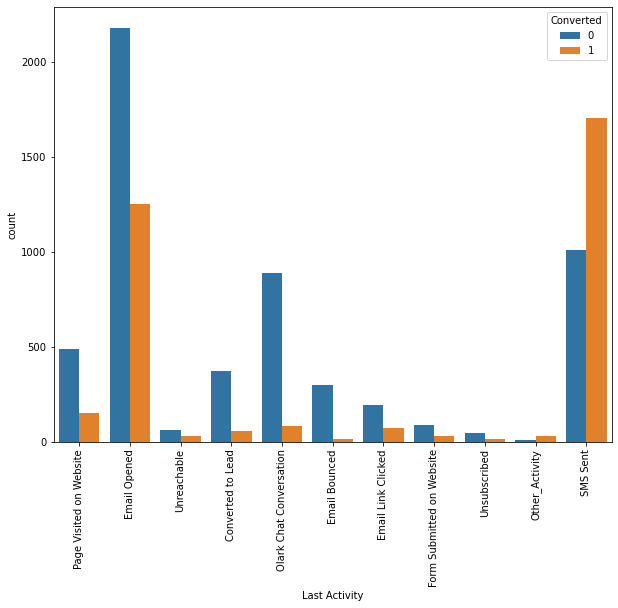

In [45]:
fig, axs = plt.subplots(figsize = (10,8))
sns.countplot(x = "Last Activity", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show()

Inference:

1.Most of the leads generated by Email opened as their last activity.

2.Conversion rate for leads with last activity is more with SMS sent.

### Specialization

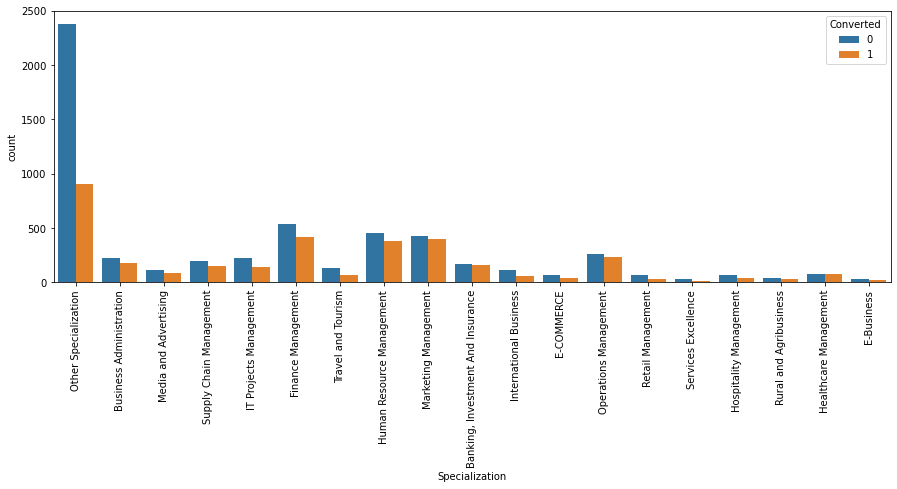

In [46]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show()

Inference:

leads and convertion rate are high in finance, marketing and HR Specialization.

### Occupation

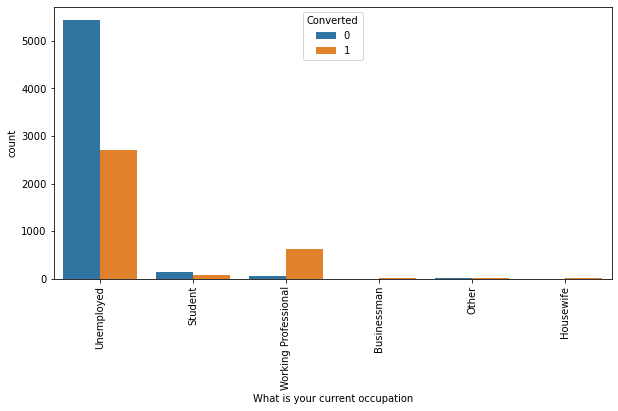

In [47]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show()

Inference:

1.Working Professionals going for the course have high chances of Convertion rate, may be they are trying for career transition.

2.Most lead generates from Unemployed with less conversion rate.

### Tags

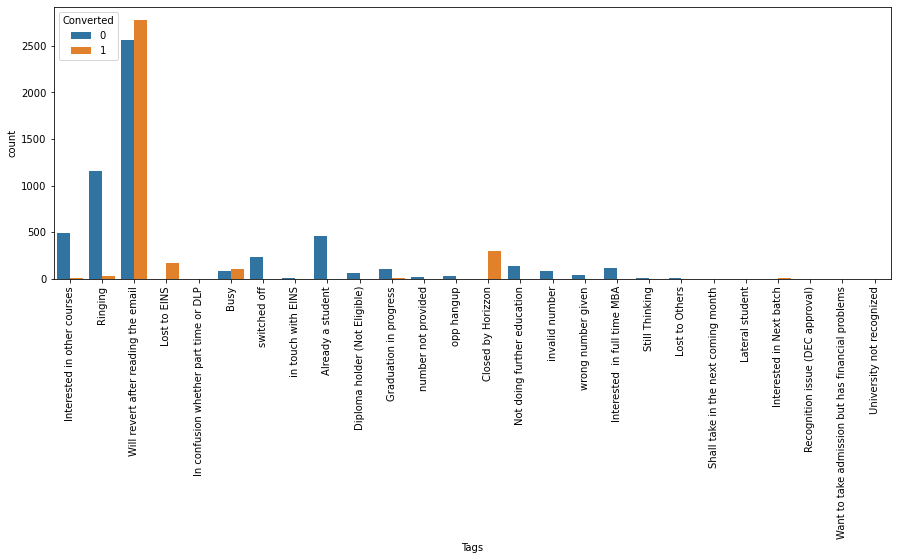

In [48]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show()

In [49]:
# Let's  club all low considerable ones replaced with  "Other_Activity"
Leads['Tags'] = Leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

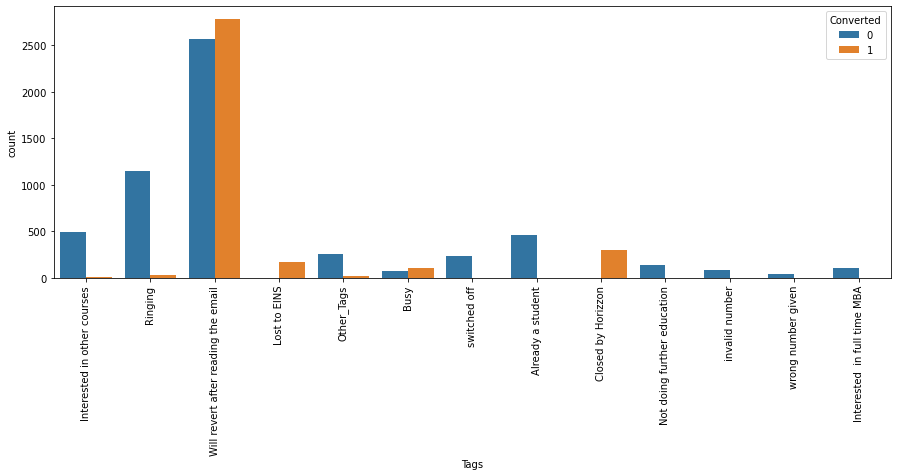

In [50]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = Leads)
plt.xticks(rotation = 90)
plt.show()

Inference:

Most convertion rates are from 'will revert after reading the email','Lost to EINS','Closed by Horizzon'.


### City

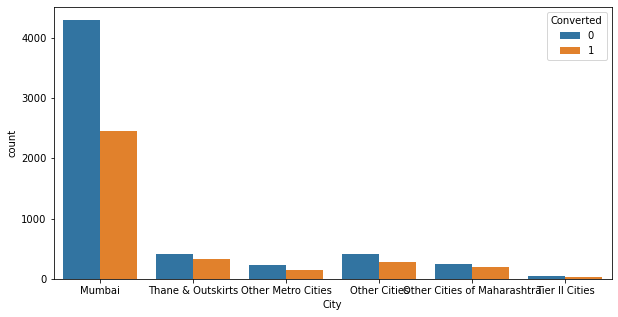

In [51]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = Leads)
plt.show()

Inference:

Most leads are from mumbai with around considerable conversion rate.

In [53]:
Leads['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [54]:
Leads['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [55]:
Leads['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [56]:
Leads['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [57]:
Leads['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [58]:
Leads['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [59]:
Leads['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [60]:
Leads['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [61]:
Leads['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [62]:
Leads['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [63]:
Leads['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [64]:
Leads['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [65]:
Leads['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [66]:
Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

In [67]:
Leads['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

All these columns Have 95% abovesame 'Value counts', so we can not get any value added information from these columns. we can drop these columns.



In [68]:
Leads = Leads.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','What matters most to you in choosing a course',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

## Step 3 : Dealing With Categorical Variables

In [69]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  Tags                

In [70]:
Leads.shape

(9074, 16)

### Converting binary variables (Yes/No) to 1/0

In [71]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads[varlist] = Leads[varlist].apply(binary_map)

### For categorical variables with multiple levels, create dummy Variables (one-hot encoded)


In [72]:
# Getting a list of categorical columns

cat_cols= Leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

In [73]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']],drop_first=True,dtype=np.int64)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [74]:
Leads.dtypes

Prospect ID                         object
Lead Origin                         object
Lead Source                         object
Do Not Email                         int64
Do Not Call                          int64
Converted                            int64
TotalVisits                        float64
Total Time Spent on Website          int64
Page Views Per Visit               float64
Last Activity                       object
Specialization                      object
What is your current occupation     object
Tags                                object
Lead Quality                        object
City                                object
Last Notable Activity               object
dtype: object

In [75]:
# Adding the Dummy variable set to the main dataframe
Leads = pd.concat([Leads, dummy1], axis=1)
Leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [76]:
Leads = Leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)
Leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Test-Train Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
# Putting feature variable to X
X = Leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [79]:
# Putting response variable to y
y = Leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [80]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 97 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   Do Not Call                                           6351 non-null   int64  
 2   TotalVisits                                           6351 non-null   float64
 3   Total Time Spent on Website                           6351 non-null   int64  
 4   Page Views Per Visit                                  6351 non-null   float64
 5   Lead Origin_Landing Page Submission                   6351 non-null   int64  
 6   Lead Origin_Lead Add Form                             6351 non-null   int64  
 7   Lead Origin_Lead Import                               6351 non-null   int64  
 8   Lead Source_Direct Traffic                            6

## Step 5: Feature Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.058552,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [83]:
# Checking the Churn Rate
Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted

37.85541106458012

You saw that the data has almost 38% churn rate. Checking the churn rate is important since you usually want your data to have a balance between the 0s and 1s (in this case churn and not-churn).Here the data neither balanced nor heavily imbalanced so we'll not have to do any special treatment for this data.

## Step 6: Looking at Correlations

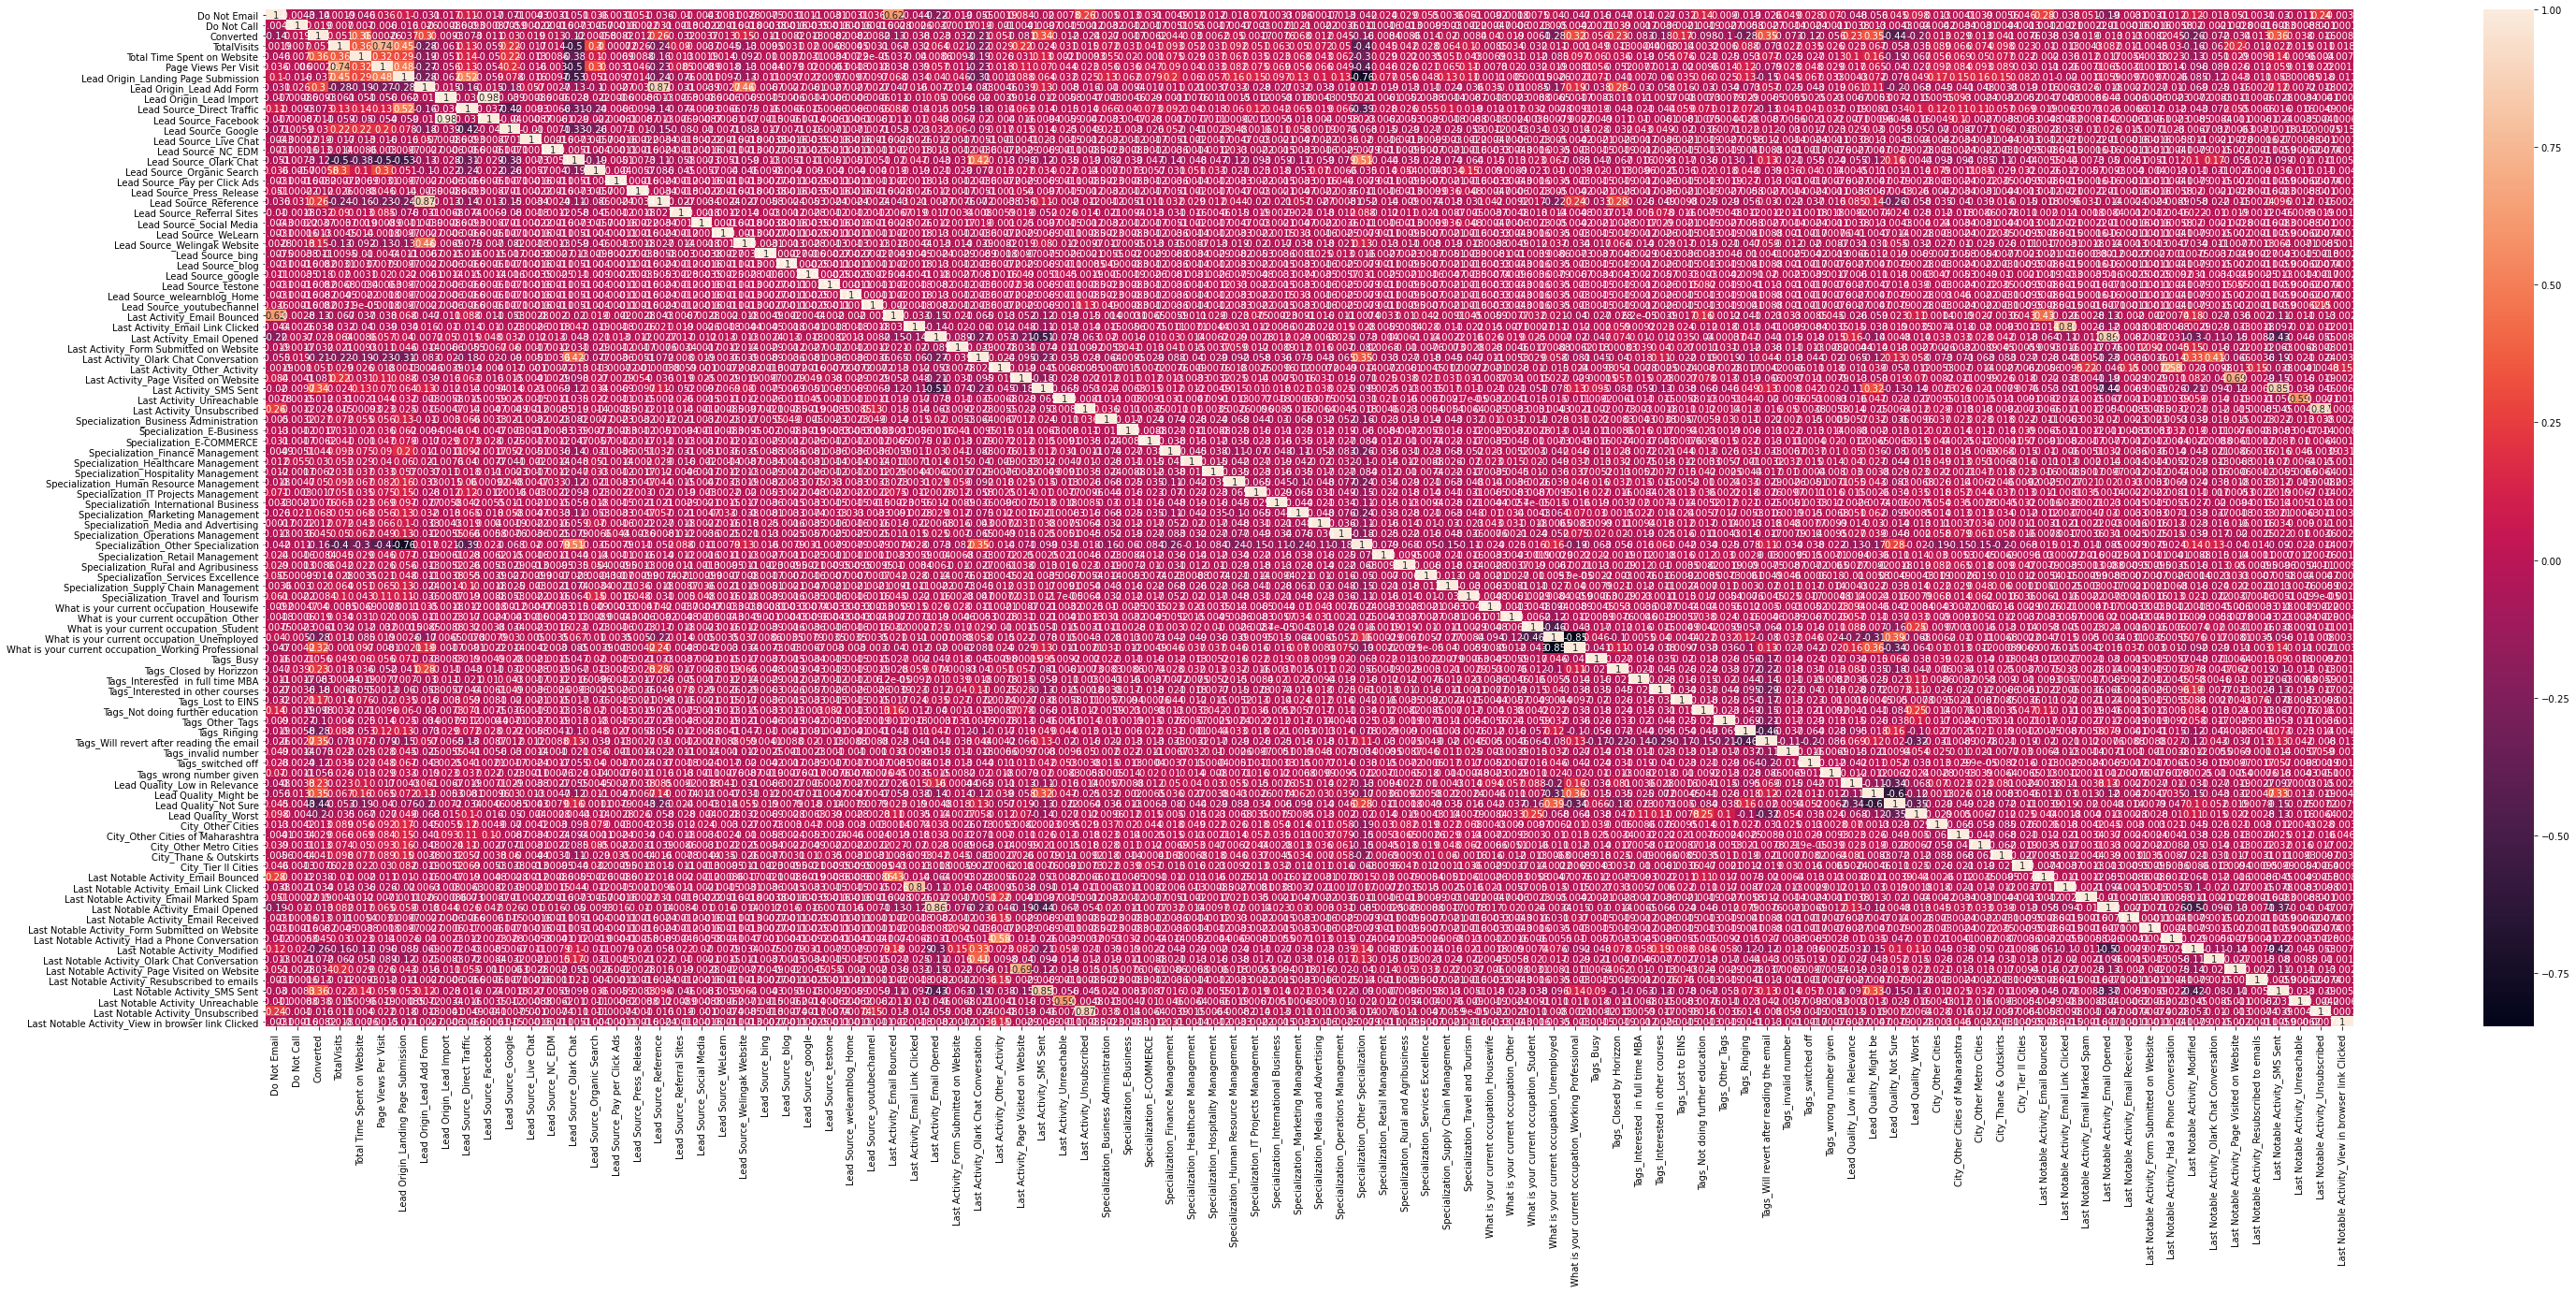

In [84]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,20))        # Size of the figure
sns.heatmap(Leads.corr(),annot = True)
plt.show()

## Step 7: Model Building

## Let's start by splitting our data into a training set and a test set.


### Running Your First Training Mode

In [85]:
import statsmodels.api as sm

## Step 8: Feature Selection Using RFE


In [86]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [87]:
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [88]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False])

In [89]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 40),
 ('TotalVisits', False, 59),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 58),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Direct Traffic', False, 34),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 56),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 82),
 ('Lead Source_Press_Release', False, 66),
 ('Lead Source_Reference', False, 64),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Social Media', False, 51),
 ('Lead Source_WeLearn', False, 83),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 57),
 ('Lead Source_blog', False, 41),
 ('Lead Source_google', False, 31),
 ('Lead Source_testone

In [90]:
col = X_train.columns[rfe.support_]

In [91]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Websit

## Building model using statsmodel, for the detailed statistics


In [92]:
# Model #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.1
Date:                Mon, 11 Apr 2022   Deviance:                       3160.2
Time:                        18:58:17   Pearson chi2:                 3.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7920      0.278     -2.845      0.004      -1.338      -0.246
Do Not Email                                  -1.3202      0.212     -6.236      0.000      -1.735      -0.905
Lead Origin_Lead Add Form                      1.0521      0.363      2.897      0.004       0.340       1.764
Lead Source_Welingak Website                   3.4638      0.819      4.231      0.000       1.859       5.068
What is your current occupation_Unemployed    -1.1148      0.237     -4.713      0.000      -1.578      -0.651
Tags_Busy                                      3.5772      0.333     10.752      0.000       2.925       4.229
Tags_Closed by Horizzon                        7.7760      0.762     10.203      0.000       6.282       9.270
Tags_Lost to EINS                              8.9986      0.754     11.931      0.000       7.520      10.477
Tags_Ringing                                  -1.9203      0.340     -5.640      0.000      -2.588      -1.253
Tags_Will revert after reading the email       3.7576      0.229     16.412      0.000       3.309       4.206
Tags_invalid number                          -23.4125   2.21e+04     -0.001      0.999   -4.34e+04    4.34e+04
Tags_switched off                             -2.5224      0.589     -4.279      0.000      -3.678      -1.367
Tags_wrong number given                      -23.0270   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                         -3.3269      0.129    -25.702      0.000      -3.581      -3.073
Lead Quality_Worst                            -3.9922      0.832     -4.798      0.000      -5.623      -2.361
Last Notable Activity_SMS Sent                 2.7952      0.122     22.846      0.000       2.555       3.035
==============================================================================================================
"""

The P value for Tags_invalid number and Tags_wrong number given are high.so we drop one feature 'Tags_invalid number'.



In [93]:
col = col.drop('Tags_invalid number',1)

In [94]:
# Model #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.9
Date:                Mon, 11 Apr 2022   Deviance:                       3171.8
Time:                        18:59:04   Pearson chi2:                 3.07e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9144      0.282     -3.245      0.001      -1.467      -0.362
Do Not Email                                  -1.3129      0.211     -6.218      0.000      -1.727      -0.899
Lead Origin_Lead Add Form                      1.0839      0.365      2.969      0.003       0.368       1.800
Lead Source_Welingak Website                   3.4275      0.819      4.184      0.000       1.822       5.033
What is your current occupation_Unemployed    -1.1577      0.239     -4.848      0.000      -1.626      -0.690
Tags_Busy                                      3.7579      0.331     11.338      0.000       3.108       4.407
Tags_Closed by Horizzon                        7.9271      0.763     10.394      0.000       6.432       9.422
Tags_Lost to EINS                              9.1535      0.755     12.128      0.000       7.674      10.633
Tags_Ringing                                  -1.7229      0.339     -5.089      0.000      -2.386      -1.059
Tags_Will revert after reading the email       3.9200      0.230     17.026      0.000       3.469       4.371
Tags_switched off                             -2.3187      0.588     -3.942      0.000      -3.471      -1.166
Tags_wrong number given                      -20.8331   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                         -3.3174      0.129    -25.685      0.000      -3.571      -3.064
Lead Quality_Worst                            -3.9830      0.834     -4.777      0.000      -5.617      -2.349
Last Notable Activity_SMS Sent                 2.7537      0.121     22.849      0.000       2.518       2.990
==============================================================================================================
"""

The P value for Tags_wrong number given are high, so we drop that feature also.



In [95]:
col = col.drop('Tags_wrong number given',1)

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm3= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.9
Date:                Mon, 11 Apr 2022   Deviance:                       3175.8
Time:                        19:00:07   Pearson chi2:                 3.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9661      0.283     -3.417      0.001      -1.520      -0.412
Do Not Email                                  -1.3127      0.211     -6.223      0.000      -1.726      -0.899
Lead Origin_Lead Add Form                      1.0963      0.366      2.995      0.003       0.379       1.814
Lead Source_Welingak Website                   3.4147      0.820      4.166      0.000       1.808       5.021
What is your current occupation_Unemployed    -1.1746      0.240     -4.899      0.000      -1.644      -0.705
Tags_Busy                                      3.8305      0.330     11.598      0.000       3.183       4.478
Tags_Closed by Horizzon                        7.9914      0.763     10.480      0.000       6.497       9.486
Tags_Lost to EINS                              9.2178      0.755     12.217      0.000       7.739      10.697
Tags_Ringing                                  -1.6472      0.337     -4.885      0.000      -2.308      -0.986
Tags_Will revert after reading the email       3.9881      0.229     17.380      0.000       3.538       4.438
Tags_switched off                             -2.2412      0.587     -3.816      0.000      -3.392      -1.090
Lead Quality_Not Sure                         -3.3158      0.129    -25.690      0.000      -3.569      -3.063
Lead Quality_Worst                            -3.9600      0.836     -4.734      0.000      -5.599      -2.321
Last Notable Activity_SMS Sent                 2.7443      0.120     22.856      0.000       2.509       2.980
==============================================================================================================
"""

In [97]:
# Calculate the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,7.18
10,Lead Quality_Not Sure,4.04
8,Tags_Will revert after reading the email,3.81
7,Tags_Ringing,1.80
1,Lead Origin_Lead Add Form,1.58
12,Last Notable Activity_SMS Sent,1.52
11,Lead Quality_Worst,1.35
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
9,Tags_switched off,1.16


In [98]:
# Dropping variable with high VIF

col = col.drop('What is your current occupation_Unemployed',1)

In [99]:
X_train_sm = sm.add_constant(X_train[col])
logm4= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.0
Date:                Mon, 11 Apr 2022   Deviance:                       3202.0
Time:                        19:01:06   Pearson chi2:                 3.48e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9192      0.211     -9.080      0.000      -2.333      -1.505
Do Not Email                                -1.2835      0.212     -6.062      0.000      -1.698      -0.868
Lead Origin_Lead Add Form                    1.2035      0.368      3.267      0.001       0.482       1.925
Lead Source_Welingak Website                 3.2825      0.820      4.002      0.000       1.675       4.890
Tags_Busy                                    3.8043      0.330     11.525      0.000       3.157       4.451
Tags_Closed by Horizzon                      7.9789      0.762     10.467      0.000       6.485       9.473
Tags_Lost to EINS                            9.1948      0.753     12.209      0.000       7.719      10.671
Tags_Ringing                                -1.8121      0.336     -5.401      0.000      -2.470      -1.154
Tags_Will revert after reading the email     3.9906      0.228     17.508      0.000       3.544       4.437
Tags_switched off                           -2.4456      0.586     -4.171      0.000      -3.595      -1.297
Lead Quality_Not Sure                       -3.5218      0.126    -28.036      0.000      -3.768      -3.276
Lead Quality_Worst                          -3.9106      0.856     -4.567      0.000      -5.589      -2.232
Last Notable Activity_SMS Sent               2.7395      0.120     22.907      0.000       2.505       2.974
============================================================================================================
"""

In [100]:
# Calculate the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Quality_Not Sure,2.62
7,Tags_Will revert after reading the email,2.57
1,Lead Origin_Lead Add Form,1.58
6,Tags_Ringing,1.52
11,Last Notable Activity_SMS Sent,1.51
2,Lead Source_Welingak Website,1.34
4,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.10
3,Tags_Busy,1.10
8,Tags_switched off,1.10


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:



In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.189946
1012    0.061006
9226    0.000707
4750    0.784007
7987    0.977108
1281    0.991926
2880    0.189946
4971    0.750786
7536    0.888099
1248    0.000707
dtype: float64

In [102]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.89945603e-01, 6.10055097e-02, 7.07499981e-04, 7.84007054e-01,
       9.77108077e-01, 9.91926005e-01, 1.89945603e-01, 7.50785828e-01,
       8.88098557e-01, 7.07499981e-04])

### Creating a dataframe with the actual churn flag and the predicted probabilities

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.189946,3009
1,0,0.061006,1012
2,0,0.000707,9226
3,1,0.784007,4750
4,1,0.977108,7987


In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.189946,3009,0
1,0,0.061006,1012,0
2,0,0.000707,9226,0
3,1,0.784007,4750,1
4,1,0.977108,7987,1


In [105]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3751  154]
 [ 357 2089]]


In [106]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9195402298850575


In [107]:
# Calculate the VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Quality_Not Sure,2.62
7,Tags_Will revert after reading the email,2.57
1,Lead Origin_Lead Add Form,1.58
6,Tags_Ringing,1.52
11,Last Notable Activity_SMS Sent,1.51
2,Lead Source_Welingak Website,1.34
4,Tags_Closed by Horizzon,1.13
0,Do Not Email,1.10
3,Tags_Busy,1.10
8,Tags_switched off,1.10


## Metrics beyond simply accuracy


In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8540474243663123

In [110]:
# Let us calculate specificity
TN / float(TN+FP)

0.9605633802816902

In [111]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03943661971830986


In [112]:
# positive predictive value 
print (TP / float(TP+FP))

0.9313419527418636


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9130963972736125


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

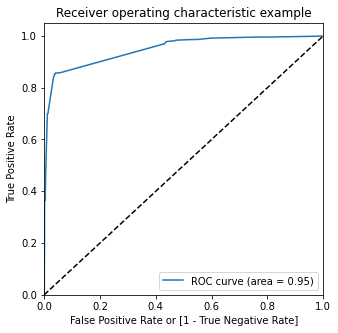

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Step 10: Finding Optimal Cutoff Point


### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity



In [117]:
# Let's create columns with different probability cutoffs 
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.706503  0.981194  0.534443
0.2   0.2  0.911195  0.857318  0.944942
0.3   0.3  0.919383  0.856909  0.958515
0.4   0.4  0.920170  0.856092  0.960307
0.5   0.5  0.919540  0.854047  0.960563
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.918753  0.843827  0.965685
0.8   0.8  0.876397  0.700327  0.986684
0.9   0.9  0.790742  0.464841  0.994878


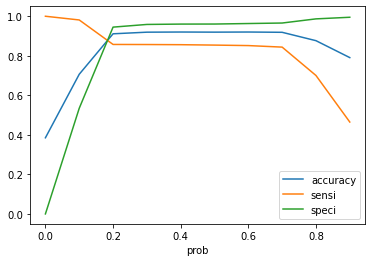

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [120]:
# From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score



In [121]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.911195087387813

In [123]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.857318070318888

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.9449423815620999

In [126]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05505761843790013


In [127]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9070069204152249


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9135924733845011


## Precision and Recall


In [129]:
# Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3751,  154],
       [ 357, 2089]], dtype=int64)

In [131]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9313419527418636

In [132]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8540474243663123

In [133]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8540474243663123

### Using sklearn utilities for the same



In [135]:
from sklearn.metrics import precision_score, recall_score

In [136]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [137]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

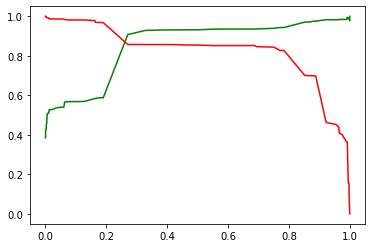

In [138]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 11: Making predictions on the test set


In [139]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.058552,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [140]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,1,0,1,0,0


In [141]:
X_test_sm = sm.add_constant(X_test)

In [142]:
y_test_pred = res.predict(X_test_sm)

In [143]:
y_test_pred[:10]

3271    0.189946
1490    0.888099
7936    0.189946
4216    0.999300
3830    0.189946
1800    0.888099
6507    0.010841
4821    0.000376
4223    0.997563
4714    0.189946
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
# Let's see the head
y_pred_1.head()

,0
3271,0.189946
1490,0.888099
7936,0.189946
4216,0.999300
3830,0.189946


In [146]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [147]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [148]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [149]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [150]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.189946
1,1,1490,0.888099
2,0,7936,0.189946
3,1,4216,0.999300
4,0,3830,0.189946


In [151]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [152]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_prob'], axis=1)

In [153]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.189946
1,1490,1,0.888099
2,7936,0,0.189946
3,4216,1,0.999300
4,3830,0,0.189946


In [154]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [155]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.189946,0
1,1490,1,0.888099,1
2,7936,0,0.189946,0
3,4216,1,0.999300,1
4,3830,0,0.189946,0


In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9078222548659567

In [157]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1640,   94],
       [ 157,  832]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8412537917087968

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.9457900807381776

Observation: After running the model on the Test Data these are the figures we obtain:

Accuracy : 90.78%

Sensitivity : 84.14%

Specificity : 94.57%

Final Observation: Let us compare the values obtained for Train & Test:

Train Data:

Accuracy : 91.11%

Sensitivity : 85.73%

Specificity : 94.49%

Test Data:

Accuracy : 90.78%

Sensitivity : 84.14%

Specificity : 94.57%